<a href="https://colab.research.google.com/github/Jang-KyungWuk/Arknights_Nien_Headhunting_Analysis/blob/master/Arknights_Nien_Headhunting_sim_v_1_3_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Reference
https://mrfz.fandom.com/wiki/Headhunting (2020-07-27-PM 18:00 (KST))
'''

'\nReference\nhttps://mrfz.fandom.com/wiki/Headhunting (2020-07-27-PM 18:00 (KST))\n'

In [2]:
# Import libraries
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define single headhunting pull function
def Headhunt(ul_count=0):
    '''Input Non-6-star operator streak count (default=0) and pull Nien featured Headhunting
    result 0: Non-6-star operator, 1: Non-featured 6-star operator, 2: Aak, 3: Nien
    '''
    # Headhunting probability parameters
    s6_prob=0.02
    ul_prob=0.02 # per pull for 50 over pulls
    featured_prob=0.7 # For Nien pickup
    nien_prob=0.5 # (UNKNOWN) Assume Aak Nien has same probability of 50%

    # Unlucky doctors get bonus on 6-star operator pull probability after 50th pull
    if ul_count>=51:
        s6_check=s6_prob+((ul_count-50)*ul_prob)
    else:
        s6_check=s6_prob

    featured_check=s6_check*featured_prob
    nien_check=featured_check*nien_prob

    op=rd.random()

    '''
    |------|------|------|-----------------------------|
    0    Nien    Aak  6-star-op                  non-6-star-op
    |<-3-->|<--2->|<-1-->|<-------------0------------->|
    '''

    if op>s6_check: # Non-6-star opertor (KOKODAYO)
        return 0
    elif op>featured_check: # Non-featured 6-star operator
        return 1
    elif op>nien_check: # Aak
        return 2
    else: # Nien
        return 3

In [4]:
# Set variables
rd.seed(123456)
samples=2105818 # KR server arknights download counts from half-anniversary briefing
result=[]

In [5]:
# Try Nien featured headhunting pull for each sample doctor
for n in range (samples):
    # Initialize doctor's record
    record=[0,0,0] # Pull count, Non-featured 6-star op, Aak
    ul_count=0
    nien=False
    # Each doctor will pull Nien at all cost :(
    while nien==False:
        op=Headhunt(ul_count)
        record[0]+=1
        if op==0: # Non-6-star operator (KOKODAYO)
            ul_count+=1
        elif op==1: # Non-featured 6-star operator
            ul_count=0
            record[1]+=1
        elif op==2: # Aak
            ul_couont=0
            record[2]+=1
        else: # Nien
            nien=True
    # Put doctors record into result
    result.append(record)

# Make result list -> np.array
result=np.array(result)

In [6]:
# Print result
print("Average pull count to get Nien :",np.average(result[:,0]))
print("Average non-featured 6-star operator get :",np.average(result[:,1]))
print("Average Aak get :",np.average(result[:,2]))

Average pull count to get Nien : 79.32621860008794
Average non-featured 6-star operator get : 0.8565991932826104
Average Aak get : 0.9994743135446653


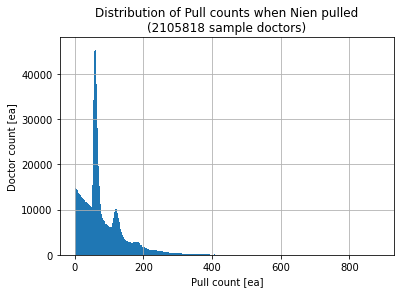

In [7]:
# Plot histogram (Pull count)
pcx=np.arange(0.5,max(result[:,0])+1,1)
plt.hist(result[:,0],pcx)
plt.title("Distribution of Pull counts when Nien pulled\n(%s sample doctors)"%(samples))
plt.xlabel("Pull count [ea]")
plt.ylabel("Doctor count [ea]")
plt.grid(True)
plt.show()

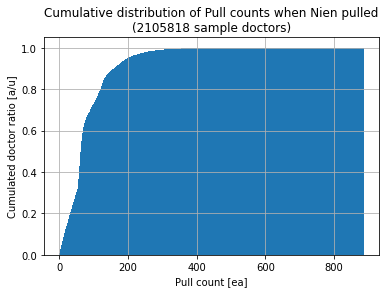

In [8]:
# Plot normalized cumulative histogram (Pull count)
plt.hist(result[:,0],pcx,cumulative=True, density=True)
plt.title("Cumulative distribution of Pull counts when Nien pulled\n(%s sample doctors)"%(samples))
plt.xlabel("Pull count [ea]")
plt.ylabel("Cumulated doctor ratio [a/u]")
plt.grid(True)
plt.show()

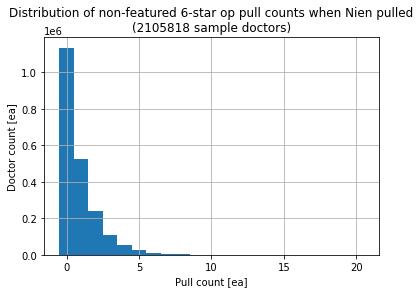

In [9]:
# Plot histogram (non-featured 6-star op)
nfx=np.arange(-0.5,max(result[:,1])+1,1)
plt.hist(result[:,1],nfx)
plt.title("Distribution of non-featured 6-star op pull counts when Nien pulled\n(%s sample doctors)"%(samples))
plt.xlabel("Pull count [ea]")
plt.ylabel("Doctor count [ea]")
plt.grid(True)
plt.show()

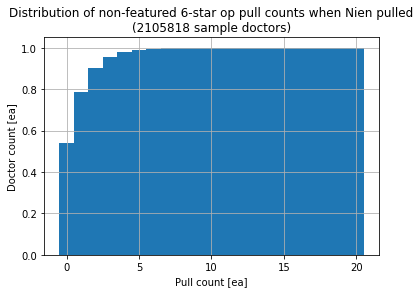

In [10]:
# Plot normalized cumulative histogram (non-featured 6-star op)
plt.hist(result[:,1],nfx,cumulative=True, density=True)
plt.title("Distribution of non-featured 6-star op pull counts when Nien pulled\n(%s sample doctors)"%(samples))
plt.xlabel("Pull count [ea]")
plt.ylabel("Doctor count [ea]")
plt.grid(True)
plt.show()

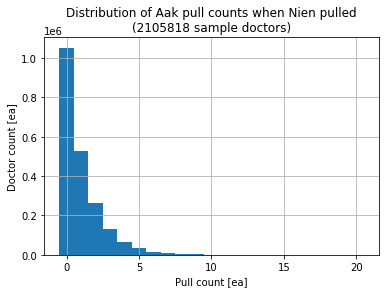

In [11]:
# Plot histogram (Aak)
apx=np.arange(-0.5,max(result[:,2])+1,1)
plt.hist(result[:,2],apx)
plt.title("Distribution of Aak pull counts when Nien pulled\n(%s sample doctors)"%(samples))
plt.xlabel("Pull count [ea]")
plt.ylabel("Doctor count [ea]")
plt.grid(True)
plt.show()

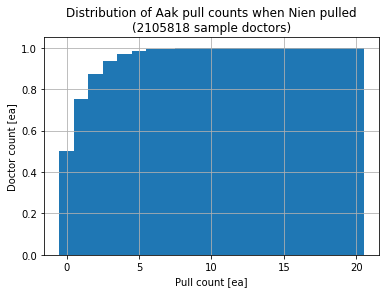

In [12]:
# Plot normalized cumulative histogram (Aak)
plt.hist(result[:,2],apx,cumulative=True, density=True)
plt.title("Distribution of Aak pull counts when Nien pulled\n(%s sample doctors)"%(samples))
plt.xlabel("Pull count [ea]")
plt.ylabel("Doctor count [ea]")
plt.grid(True)
plt.show()

In [13]:
# The luckiest doctor
l_doctor_num=list(result[:,0]).index(min(result[:,0]))
print("The luckiest doctor had %s headhunting pull to get Nien"%(result[l_doctor_num,0]))
print("The luckiest doctor got %s non-featured 6-star operator"%(result[l_doctor_num,1]))
print("The luckiest doctor got %s Aak"%(result[l_doctor_num,2]))

The luckiest doctor had 1 headhunting pull to get Nien
The luckiest doctor got 0 non-featured 6-star operator
The luckiest doctor got 0 Aak


In [14]:
# The unluckiest doctor
ul_doctor_num=list(result[:,0]).index(max(result[:,0]))
print("The unluckiest doctor had %s headhunting pull to get Nien"%(result[ul_doctor_num,0]))
print("The unluckiest doctor got %s non-featured 6-star operator"%(result[ul_doctor_num,1]))
print("The unluckiest doctor got %s Aak"%(result[ul_doctor_num,2]))

The unluckiest doctor had 886 headhunting pull to get Nien
The unluckiest doctor got 16 non-featured 6-star operator
The unluckiest doctor got 14 Aak
